In [1]:
# 1. SETUP
# let's create a dataframe
import pandas as pd
import numpy as np

london_weather = pd.read_csv("london_weather.csv")

# convert date column to datetime format
london_weather['date'] = pd.to_datetime(london_weather['date'], format="%Y%m%d")
london_weather.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [2]:
# 2. DATA AGGREGATION
london_weather.groupby(london_weather['date'].dt.year).mean()['mean_temp']

date
1979     9.986575
1980    10.370492
1981    10.320000
1982    10.998904
1983    11.237260
1984    10.942350
1985    10.095890
1986     9.998356
1987    10.287945
1988    10.873770
1989    12.095890
1990    12.083562
1991    10.711507
1992    11.228142
1993    10.854795
1994    11.720548
1995    11.926849
1996    10.550820
1997    12.043836
1998    11.661918
1999    11.953425
2000    11.582514
2001    11.339452
2002    12.084384
2003    12.138356
2004    11.868579
2005    11.827624
2006    12.378151
2007    11.938547
2008    11.325140
2009    11.743923
2010    10.635890
2011    12.378082
2012    11.329781
2013    11.164110
2014    12.660000
2015    12.137260
2016    11.919126
2017    12.210685
2018    12.529315
2019    12.193973
2020    12.701950
Name: mean_temp, dtype: float64

In [3]:
# usa il metodo .agg() (aggregate method)
# groupby year -> apply functions -> select mean_temp column -> rename column lambda o to calc_range
df = london_weather.groupby(london_weather['date'].dt.year).agg(['min', 'mean', 'max', lambda x: x.max() - x.min()])['mean_temp'].rename(columns={"<lambda_0>": "calc_range"})
df.head()

,min,mean,max,calc_range
date,,,,
1979,-4.1,9.986575,22.2,26.3
1980,-1.8,10.370492,22.0,23.8
1981,-4.4,10.320000,22.8,27.2
1982,-4.2,10.998904,23.2,27.4
1983,-1.2,11.237260,26.0,27.2


<Axes: xlabel='date'>

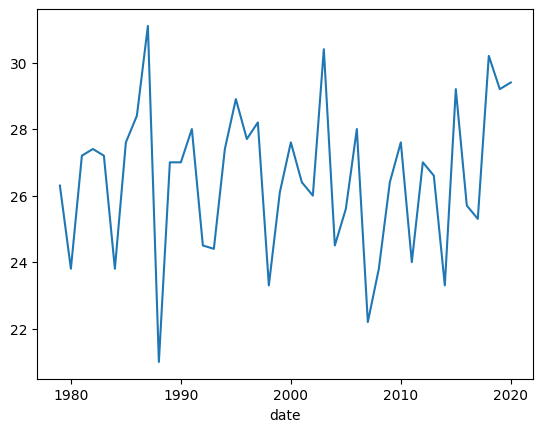

In [4]:
# plot the dataframe
df['calc_range'].plot()

In [5]:
london_weather[['sunshine', 'snow_depth']].groupby(london_weather['date'].dt.year).agg(['min', 'mean', 'max'])

sunshine                 snow_depth                
          min      mean   max        min      mean   max
date                                                    
1979      0.0  3.896438  15.0        0.0  0.128767   9.0
1980      0.0  4.142077  14.5        0.0  0.000000   0.0
1981      0.0  3.601370  14.3        0.0  0.189041  22.0
1982      0.0  4.142740  13.7        0.0  0.306849  18.0
1983      0.0  4.101644  14.7        0.0  0.008219   3.0
1984      0.0  4.292077  14.8        0.0  0.000000   0.0
1985      0.0  4.211781  15.7        0.0  0.123288   5.0
1986      0.0  4.173151  14.5        0.0  0.101370   8.0
1987      0.0  3.813973  15.1        0.0  0.032877   4.0
1988      0.0  4.119126  14.7        0.0  0.000000   0.0
1989      0.0  5.187945  15.6        0.0  0.000000   0.0
1990      0.0  5.225205  15.1        0.0  0.000000   0.0
1991      0.0  4.115342  13.1        0.0  0.136986  12.0
1992      0.0  3.939891  14.4        0.0  0.000000   0.0
1993      0.0  4.066027  15.1        0.0  0.000000   0.0
1994      0.0  4.581644  15.5        0.0  0.013699   3.0
1995      0.0  5.156712  15.7        0.0  0.002740   1.0
1996      0.0  4.685792  15.7        0.0  0.019126   3.0
1997      0.0  4.944110  15.2        0.0  0.000000   0.0
1998      0.0  4.325479  14.4        0.0  0.000000   0.0
1999      0.0  4.968767  15.5        0.0  0.000000   0.0
2000      0.0  4.237158  15.1        0.0  0.008197   2.0
2001      0.0  4.785753  15.2        0.0  0.000000   0.0
2002      0.0  4.471781  15.5        0.0  0.000000   0.0
2003      0.0  5.489041  15.4        0.0  0.024658   4.0
2004      0.0  4.477869  15.2        0.0  0.005464   2.0
2005      0.0  4.595890  15.3        0.0  0.008264   1.0
2006      0.0  4.099452  14.7        0.0  0.000000   0.0
2007      0.0  4.189589  14.0        0.0  0.030151   3.0
2008      0.0  3.852186  13.4        0.0  0.021622   2.0
2009      0.0  4.132877  14.9        0.0  0.130435  12.0
2010      0.0  3.754795  14.9        0.0  0.274725   7.0
2011      0.0  4.219452  14.7        0.0  0.000000   0.0
2012      0.0  4.105464  14.4        0.0  0.054645   7.0
2013      0.0  3.979178  14.5        0.0  0.035616   5.0
2014      0.0  4.570959  14.4        0.0  0.000000   0.0
2015      0.0  4.130685  14.7        0.0  0.000000   0.0
2016      0.0  4.026503  14.4        0.0  0.000000   0.0
2017      0.0  3.978082  14.3        0.0  0.002740   1.0
2018      0.0  4.670685  14.5        0.0  0.008219   2.0
2019      0.0  4.235890  14.1        0.0  0.005479   2.0
2020      0.0  5.018033  16.0        NaN       NaN   NaN